In [1]:
import numpy as np              #匯入numpy模組，支援維度陣列與矩陣運算
import pandas as pd             #匯入pandas模組，提供數據分析lib
import csv                      #匯入csv模組，讀取或產生 csv 檔案，
                                #逗點分隔（Comma-Separated Values）是一種以逗號分隔不同欄位的資料格式
import random                   #匯入random模組，隨機取數
import math                     #匯入math模組，支援數學功能
import operator                 #匯入operator模組，支援一些運算和和比較內置的函數
import matplotlib.pyplot as plt #匯入matplotlib.pyplot模組，繪圖功能，之後以plt簡稱呼叫
#圖表繪製擴展庫，此指令可以將matplotlib的圖表直接嵌入到Notebook之中，
 #或者使用指定的界面库顯示圖表，inline表示將圖表嵌入到Notebook中。
get_ipython().run_line_magic('matplotlib', 'inline')

In [49]:
# 載入train.csv資料
train_data      = pd.read_csv('train.csv', encoding = 'utf8') #讀⼊train.csv的檔案，並可使用中文
test_data       = pd.read_csv('test.csv')                     #讀⼊test.csv的檔案，並可使用中文
submission_data = pd.read_csv('submission.csv')               #讀⼊submission.csv的檔案，並可使用中文
train_data      = train_data.rename(columns = {'花萼長度':'sepal_l','花萼寬度':'sepal_w',
                                               '花瓣長度':'petal_l','花瓣寬度':'petal_w','屬種':'species'})
test_data       = test_data.rename(columns  = {'花萼長度':'sepal_l','花萼寬度':'sepal_w',
                                               '花瓣長度':'petal_l','花瓣寬度':'petal_w','屬種':'species'})
train_data.head(5)                                           #列出開頭前五項的內容

,id,sepal_l,sepal_w,petal_l,petal_w,species,type
0,1,5.4,3.7,1.5,0.2,Iris-setosa,1
1,2,4.8,3.4,1.6,0.2,Iris-setosa,1
2,3,4.8,3.0,1.4,0.1,Iris-setosa,1
3,4,4.3,3.0,1.1,0.1,Iris-setosa,1
4,5,5.8,4.0,1.2,0.2,Iris-setosa,1


In [4]:
df1 = pd.get_dummies(train_data['species'])
df1.sample(5)#隨機選取五項印出
#pandas使用get_dummies可以很方便的對離散型特徵進行one-hot編碼
#離散特徵的編碼分為兩種情況：
#1、離散特徵的取值之間沒有大小的意義，比如color：[red,blue],那麼就使用one-hot編碼
#2、離散特徵的取值有大小的意義，比如size:[X,XL,XXL],那麼就使用數值的映射{X:1,XL:2,XXL:3}

,Iris-new_type,Iris-setosa,Iris-versicolor,Iris-virginica
86,0,0,0,1
42,0,0,1,0
89,0,0,0,1
84,0,0,0,1
34,0,1,0,0


In [5]:
df2 = train_data['species'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})#重新命名個別品種編號
df2.sample(5)            #隨機選取五項印出

31    1
9     1
10    1
37    1
91    3
Name: species, dtype: object

In [6]:
#missing data-缺值處理
miss_sum = train_data.isnull().sum().sort_values(ascending=False)
miss_sum
# 利用pandas裡的 isnull 加上 sum 可以看出哪些特徵值有空值(缺值)

sepal_w    1
sepal_l    1
type       0
species    0
petal_w    0
petal_l    0
id         0
dtype: int64

In [7]:
#印出哪幾筆具有空值資料
print(train_data[train_data['sepal_w'].isnull()])
print("-----------------------------------------------------------------------")
print(train_data[train_data['sepal_l'].isnull()])


      id  sepal_l  sepal_w  petal_l  petal_w        species  type
121  122      5.2      NaN      5.1      1.8  Iris-new_type     4
-----------------------------------------------------------------------
      id  sepal_l  sepal_w  petal_l  petal_w        species  type
120  121      NaN      3.0      4.9      1.2  Iris-new_type     4


In [8]:
#直接把 NaN drop(清掉) (若筆數很少,不影響建模的時候，而train資料123筆中只有2筆具有空值，故使用)
train_data_d_na = train_data.dropna().reset_index(drop=True)       #dropna()刪除帶有nan的所有項
train_data_d_na.isnull().sum().sort_values(ascending=False)        #再查看一次是否還有空值

type       0
species    0
petal_w    0
petal_l    0
sepal_w    0
sepal_l    0
id         0
dtype: int64

In [9]:
#將花萼長度空值補上眾數
train_data[['sepal_l']] = train_data[['sepal_l']].fillna(train_data['sepal_l'].mode()[0])
#將花萼寬度空值補上平均數
train_data[['sepal_w']] = train_data[['sepal_w']].fillna(np.mean(train_data[['sepal_w']]))
#fillna()用某一個特定值取代所有nan，此是用train_data[['花萼寬度']平均值取代

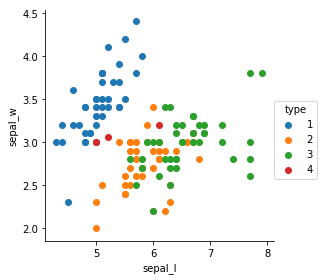

In [10]:
# 觀看 花萼長度sepal_l & 花萼寬度sepal_w 分布狀況
import seaborn as sns   #Seaborn套件是以 matplotlib 為基礎建構的高階繪圖套件，可視為是 matplotlib 的補強
sns.FacetGrid(train_data, hue="type", size=4).map(plt.scatter, "sepal_l", "sepal_w").add_legend();
plt.show();
#FacetGrid()函數映射

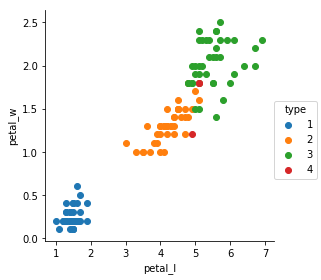

In [11]:
# 觀看 花瓣長度petal_l & 花瓣寬度petal_w 分布狀況
sns.FacetGrid(train_data, hue="type", size=4).map(plt.scatter, "petal_l", "petal_w").add_legend();
plt.show();

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218A7A3ECF8>,
      dtype=object)

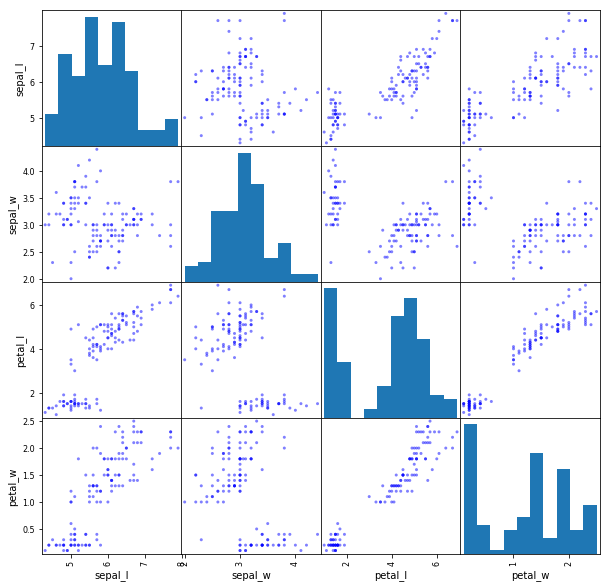

In [12]:
from pandas.plotting import scatter_matrix #scatter_matrix 創建散佈圖矩陣
scatter_matrix( train_data[['sepal_l','sepal_w','petal_l','petal_w']],figsize=(10, 10),color='b')

In [13]:
#在長度寬度分佈圖可以粗略得知：Iris-setosa不管在花萼長度寬度、花瓣長度寬度皆能明顯區隔
#而區分Iris-versicolor和Irish-verginica或是Iris-new_type則可依花瓣長度寬度做區分
#故接下來開始討論各資料的相關性
train_data[['sepal_l','sepal_w','petal_l','petal_w']].corr()
#相關分析（correlation analysis）-函數說明：
#如果由資料框調用corr函數，那麼將會計算每個列兩兩之間的相似度
#如果由序列調用corr方法，那麼只是該序列與傳入的序列之間的相關度

,sepal_l,sepal_w,petal_l,petal_w
sepal_l,1.000000,-0.130174,0.850649,0.810219
sepal_w,-0.130174,1.000000,-0.436213,-0.367957
petal_l,0.850649,-0.436213,1.000000,0.958595
petal_w,0.810219,-0.367957,0.958595,1.000000


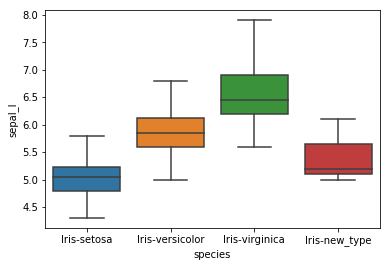

In [14]:
#印出每屬種species之花萼長度分布
sns.boxplot(x='species',y='sepal_l', data=train_data)
plt.show()


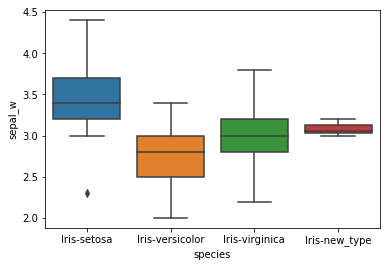

In [15]:
#印出每屬種species之花萼寬度分布
sns.boxplot(x='species',y='sepal_w', data=train_data)
plt.show()

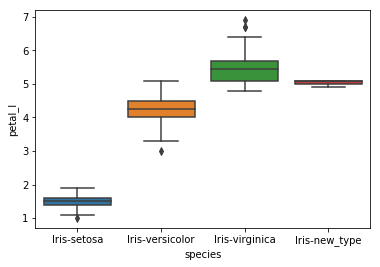

In [16]:
#印出每屬種species之花瓣長度分布
sns.boxplot(x='species',y='petal_l', data=train_data)
plt.show()

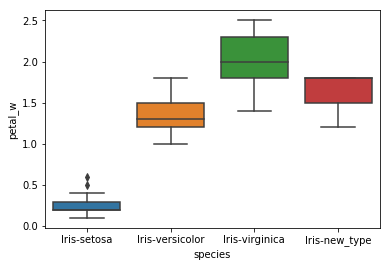

In [17]:
#印出每屬種species之花瓣寬度分布
sns.boxplot(x='species',y='petal_w', data=train_data)
plt.show()

In [18]:
#由上面四張盒鬚圖（Box plot）可知，四種屬種可由'花瓣長度'與'花瓣寬度'來做區隔
#由相關分析（correlation analysis）中也可知道，花瓣長度與寬度具有高度相關

In [19]:
#把示範用的 type 4, 資料去除, 以免干擾建模
train_data = train_data[train_data['type']!=4]

In [24]:
from sklearn.model_selection import train_test_split
#sklearn是python的一個模組，用於機器學習方面。
#train_test_split是劃分資料集的一個函數，此處用來資料分切。

x = train_data[['petal_l','petal_w','sepal_l','sepal_w']]
y = train_data['type']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=100)# 0.3給test,0.7給train

In [32]:
#標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)
#使用sklearn.preprocessing.StandardScaler類，使用該類的好處在於可以保存訓練集中的參數（均值、方差）直接使用其物件轉換測試集資料，
#且是針對每一個特徵維度來做的，而不是針對樣本。

In [36]:
#建立初步模型-KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#K最近鄰(k-Nearest Neighbor，KNN)分類演算法的核心思想：
#是如果一個樣本在特徵空間中的k個最相似(即特徵空間中最鄰近)的樣本中的大多數屬於某一個類別，則該樣本也屬於這個類別。
#KNN演算法可用於多分類，KNN演算法不僅可以用於分類，還可以用於回歸。
#通過找出一個樣本的k個最近鄰居，將這些鄰居的屬性的平均值賦給該樣本，作為預測值。
#KNeighborsClassifier在scikit-learn 在sklearn.neighbors包之中。
#KNeighborsClassifier使用很簡單，三步：1.創建KNeighborsClassifier物件，2.調用fit函數，3.調用predict函數進行預測。

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(x_train_std, y_train)

print(metrics.classification_report(y_test, knn.predict(x_test_std)))
print(metrics.confusion_matrix(y_test, knn.predict(x_test_std)))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       0.90      0.90      0.90        10
          3       0.92      0.92      0.92        12

avg / total       0.94      0.94      0.94        36

[[14  0  0]
 [ 0  9  1]
 [ 0  1 11]]


In [38]:
from sklearn.ensemble import RandomForestClassifier
#隨機森林（Random forest）
#隨機森林演算法會對資料從列方向（觀測值方向）與欄方向（變數方向）進行 Bootstrap sampling，得到不同的訓練資料，
#然後根據這些訓練資料得到一系列的決策樹分類器

rfc = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='auto', oob_score=True)
rfc.fit(x_train, y_train) #不標準化

print("oob_score(accuary):",rfc.oob_score_)
print(metrics.classification_report(y_test, rfc.predict(x_test)))

oob_score(accuary): 0.9285714285714286
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      0.90      0.95        10
          3       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        36



In [40]:
import xgboost as xgb

gbm = xgb.XGBClassifier(n_estimators= 2000, max_depth= 4).fit(x_train, y_train)

print(metrics.classification_report(y_test, gbm.predict(x_test)))
print("Score:", gbm.score(x_test, y_test))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      0.90      0.95        10
          3       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        36

Score: 0.9722222222222222


C:\Users\ms604\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ms604\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [52]:
pred = gbm.predict(test_data[['petal_l', 'petal_w', 'sepal_l', 'sepal_w']])

C:\Users\ms604\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [53]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3], dtype=int64)

In [55]:
# Generate Submission File 
StackingSubmission = pd.DataFrame({ 'id': submission_data.id, 'type': pred })
StackingSubmission.to_csv("submission.csv", index=False)

In [56]:
submission = pd.read_csv('submission.csv', encoding = "utf-8", dtype = {'type': np.int32})
submission

,id,type
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1
